In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import numpy as np

import tdgl
ureg = tdgl.ureg

In [2]:
no_screening_solution = tdgl.Solution.from_hdf5("../data/simulation/squid-no-vortices/output-0.h5")

In [3]:
device = no_screening_solution.device
xi = device.coherence_length
lambda_ = device.london_lambda
d = device.thickness

The Ginzburg-Landau depairing current density is
$$
J_c=\left(\frac{2}{3}\right)^{3/2}\frac{B_c}{\mu_0\lambda}=\frac{1}{3\sqrt{3}}\frac{\Phi_0}{\mu_0\pi\xi\lambda^2},
$$
where $B_c=\Phi_0/(2\sqrt{2}\pi\xi\lambda)$ is the thermodynamic critical field assuming a uniform applied field.

In [4]:
Jc = (1 / (np.pi * 3 * np.sqrt(3)) * ureg("Phi_0 / mu_0") / (xi * lambda_**2)).to("uA / um**2")
Kc = (Jc * d).to("uA / um")
print(f"Jc = {Jc:.3f~P}")
print(f"Kc = {Kc:.3f~P}")

Jc = 61.456 µA/µm²
Kc = 12.291 µA/µm


In [5]:
K = no_screening_solution.current_density
Kmax = np.sqrt(np.sum(K**2, axis=1)).max()
print(f"Kmax (no screening) = {Kmax:.3f~P}")

Kmax (no screening) = 14.107 µA/µm


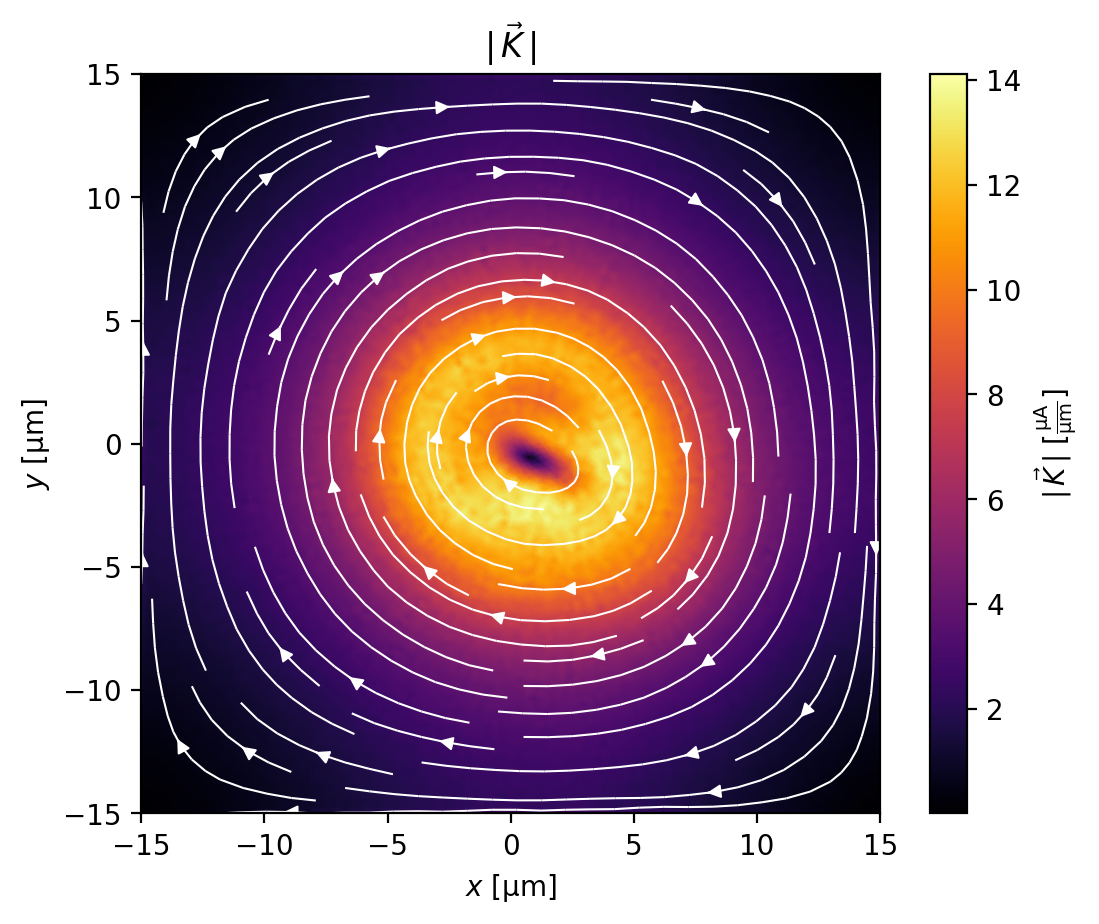

In [6]:
fig, ax = no_screening_solution.plot_currents()

In [7]:
A0 = xi * device.Bc2
A_applied = (A0 * no_screening_solution.tdgl_data.applied_vector_potential).to("uT * um")
A_applied_max = np.sqrt(np.sum(A_applied**2, axis=1)).max()
print(f"A_applied_max = {A_applied_max:.3f~P}")

A_applied_max = 333.976 µT·µm


In [8]:
screening_solution = tdgl.Solution.from_hdf5(
    "../data/simulation/squid-no-vortices-screening/output-0.h5"
)

In [9]:
K = screening_solution.current_density
Kmax = np.sqrt(np.sum(K**2, axis=1)).max()
print(f"Kmax (with screening) = {Kmax:.3f~P}")

Kmax (with screening) = 14.303 µA/µm


In [10]:
A0 = xi * device.Bc2
A_applied = (A0 * screening_solution.tdgl_data.applied_vector_potential).to("uT * um")
A_induced = (A0 * screening_solution.tdgl_data.induced_vector_potential).to("uT * um")
A_applied_max = np.sqrt(np.sum(A_applied**2, axis=1)).max()
A_induced_max = np.sqrt(np.sum(A_induced**2, axis=1)).max()
print(f"A_applied_max = {A_applied_max:.3f~P}")
print(f"A_induced_max = {A_induced_max:.3f~P}")
ratio = (A_induced_max / A_applied_max).magnitude
print(f"A_induced_max / A_applied_max = {100 * ratio:.3f}%")

A_applied_max = 333.976 µT·µm
A_induced_max = 22.549 µT·µm
A_induced_max / A_applied_max = 6.752%


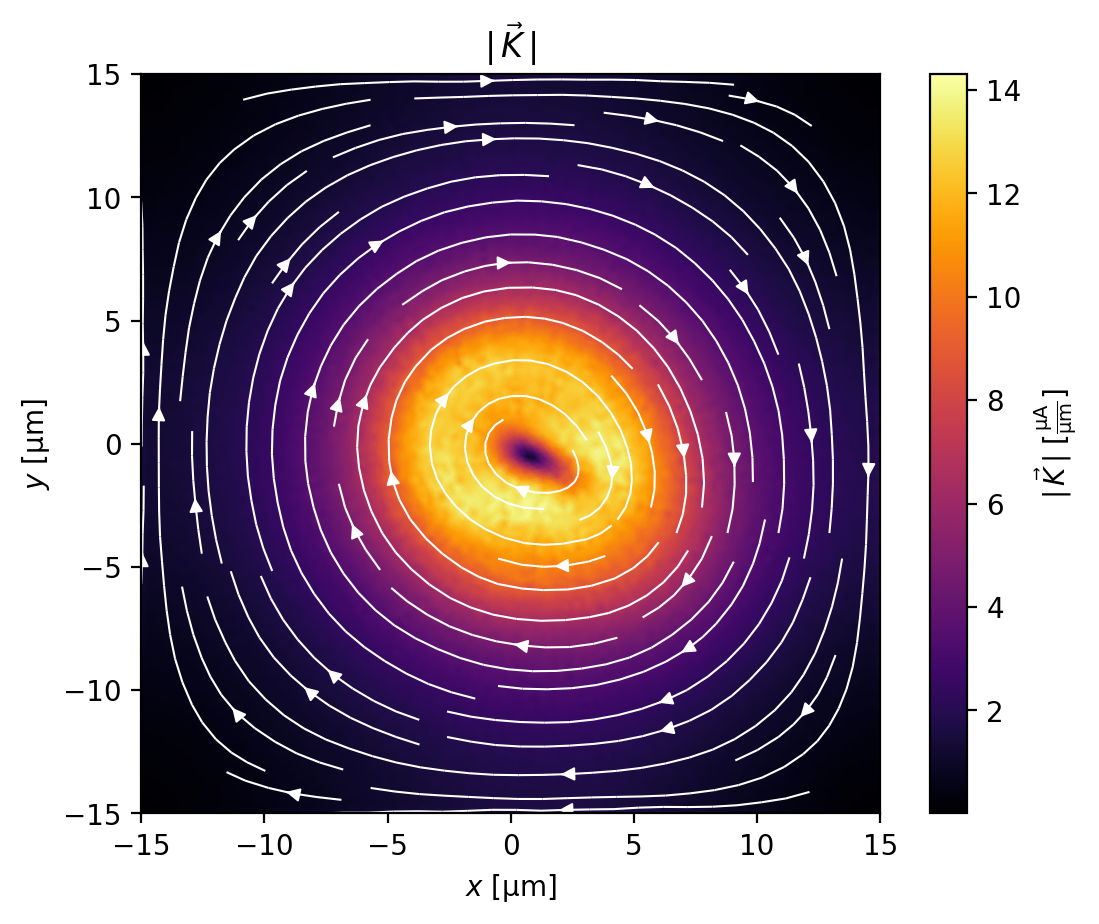

In [11]:
fig, ax = screening_solution.plot_currents()